In [34]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [36]:
df = pd.read_csv(r'E:\final year project\vaccination_tweets.csv')

In [37]:
print(df.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [38]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [39]:

df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [40]:

text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()



,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [30]:

print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [41]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [43]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [45]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # if you're using WordNetLemmatizer
nltk.download('omw-1.4')  # optional, but often used with lemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\banik\AppData\Roaming\nltk_data...


True

In [46]:
text_df = text_df.drop_duplicates('text')

In [48]:

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


In [49]:

text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [50]:
text_df.head()


,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [51]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")


Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [52]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [53]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [54]:
text_df.head(10)

,text,polarity
0,Same folks said daikon paste could treat a cyt...,0.000
1,While the world has been on the wrong side of ...,-0.500
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.000
3,"Facts are immutable, Senator, even when you're...",-0.050
4,Explain to me again why we need a vaccine @Bor...,0.000
5,Does anyone have any useful advice/guidance fo...,0.400
6,it is a bit sad to claim the fame for success ...,-0.100
7,There have not been many bright days in 2020 b...,0.675
8,Covid vaccine; You getting it?\n\n #CovidVacci...,0.000
9,#CovidVaccine \n\nStates will start getting #C...,0.000


In [55]:

def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"


In [56]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [57]:
text_df.head()


,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.00,Neutral
1,While the world has been on the wrong side of ...,-0.50,Negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.00,Neutral
3,"Facts are immutable, Senator, even when you're...",-0.05,Negative
4,Explain to me again why we need a vaccine @Bor...,0.00,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

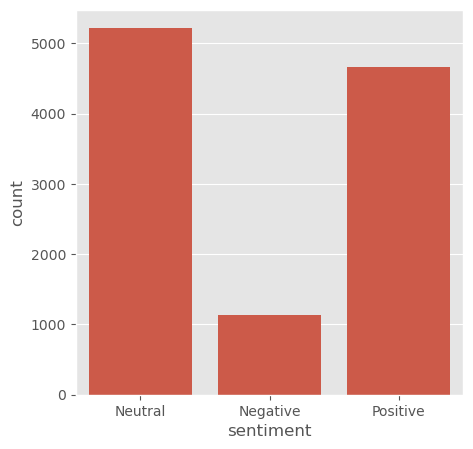

In [58]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)


Text(0.5, 1.0, 'Distribution of sentiments')

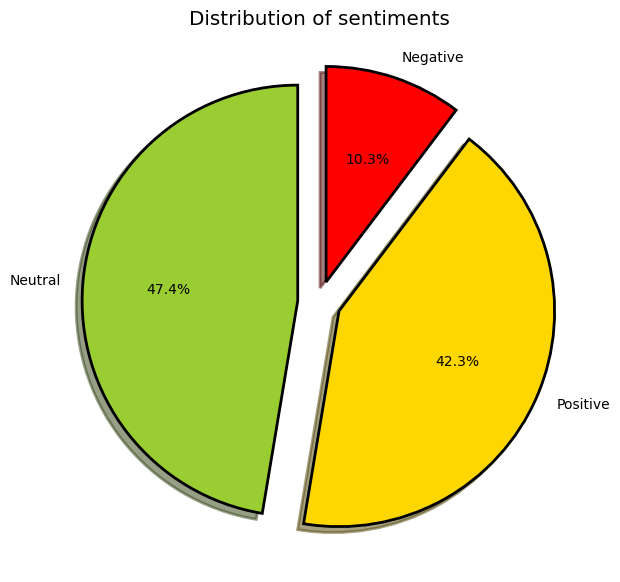

In [59]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [60]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()


,text,polarity,sentiment
6575,The best 😂😂😂😂\n#CovidVaccine #PfizerBiontech h...,1.0,Positive
5193,A wonderful update by #RANP @LoftusOrla at our...,1.0,Positive
3647,Proud receiver of the Covid-19 vaccine! #Pfize...,1.0,Positive
6732,Primera Dosis #PfizerBiontech #Covid_19 #YoMeV...,1.0,Positive
3650,The Best Way To Start 2021 🔥\nJABBED!!!😎 \n\n#...,1.0,Positive


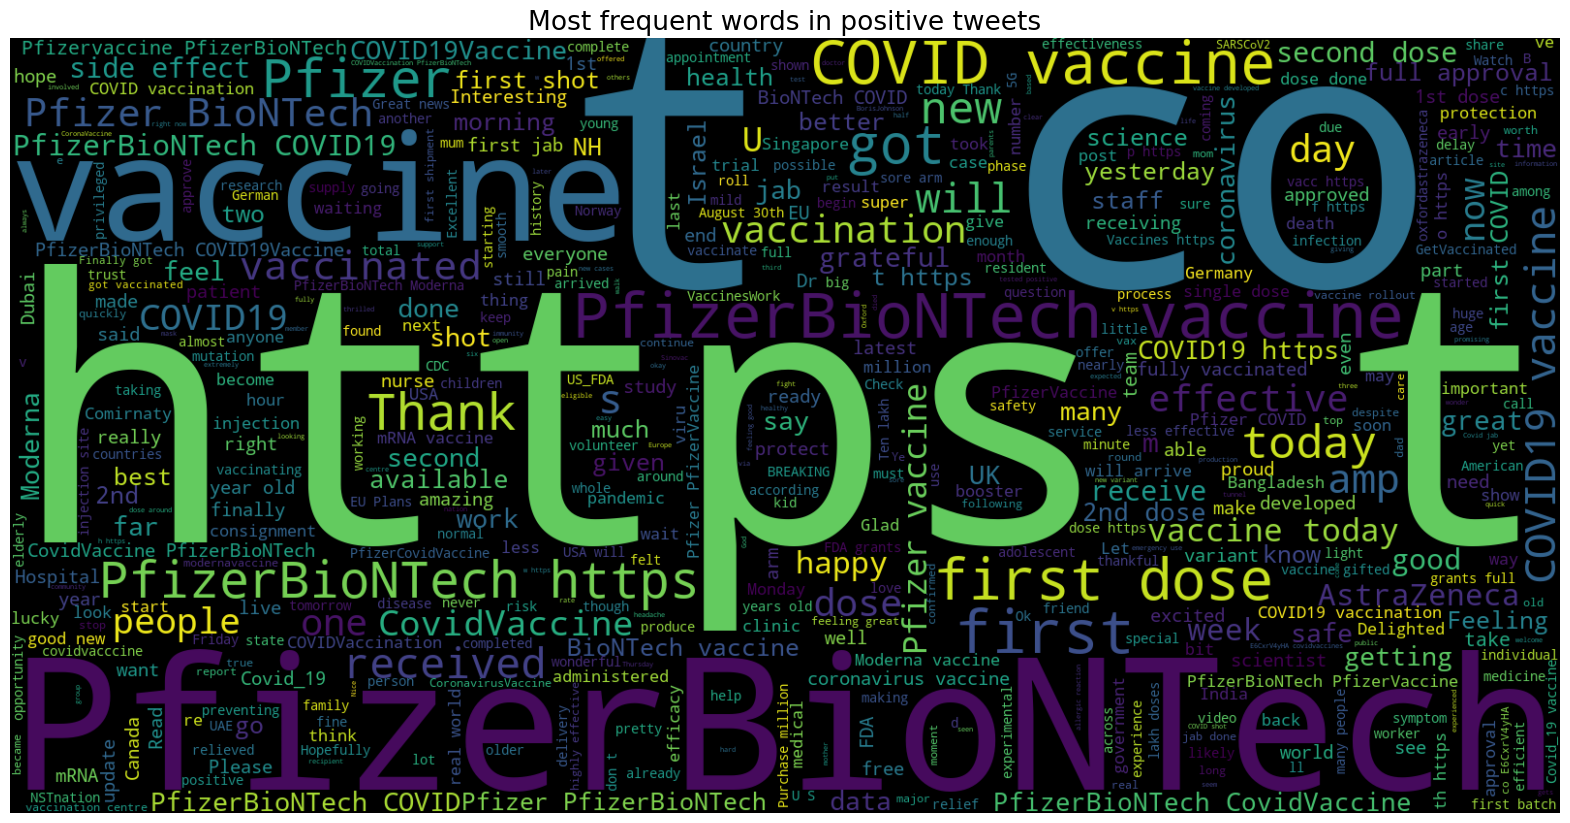

In [61]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()


In [62]:

neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()


,text,polarity,sentiment
3617,"@vonderleyen, lets get some things clear. \n\n...",-6.938894e-18,Negative
3940,"Vaccines can have side effects, but they are e...",-9.251859e-18,Negative
8172,"This should make ""vaccination-center"" life muc...",-4.166667e-03,Negative
7157,@Nas_k27 My second dose due end of next month ...,-6.250000e-03,Negative
2907,In 2015 we were worried about absence of mRNA ...,-6.250000e-03,Negative


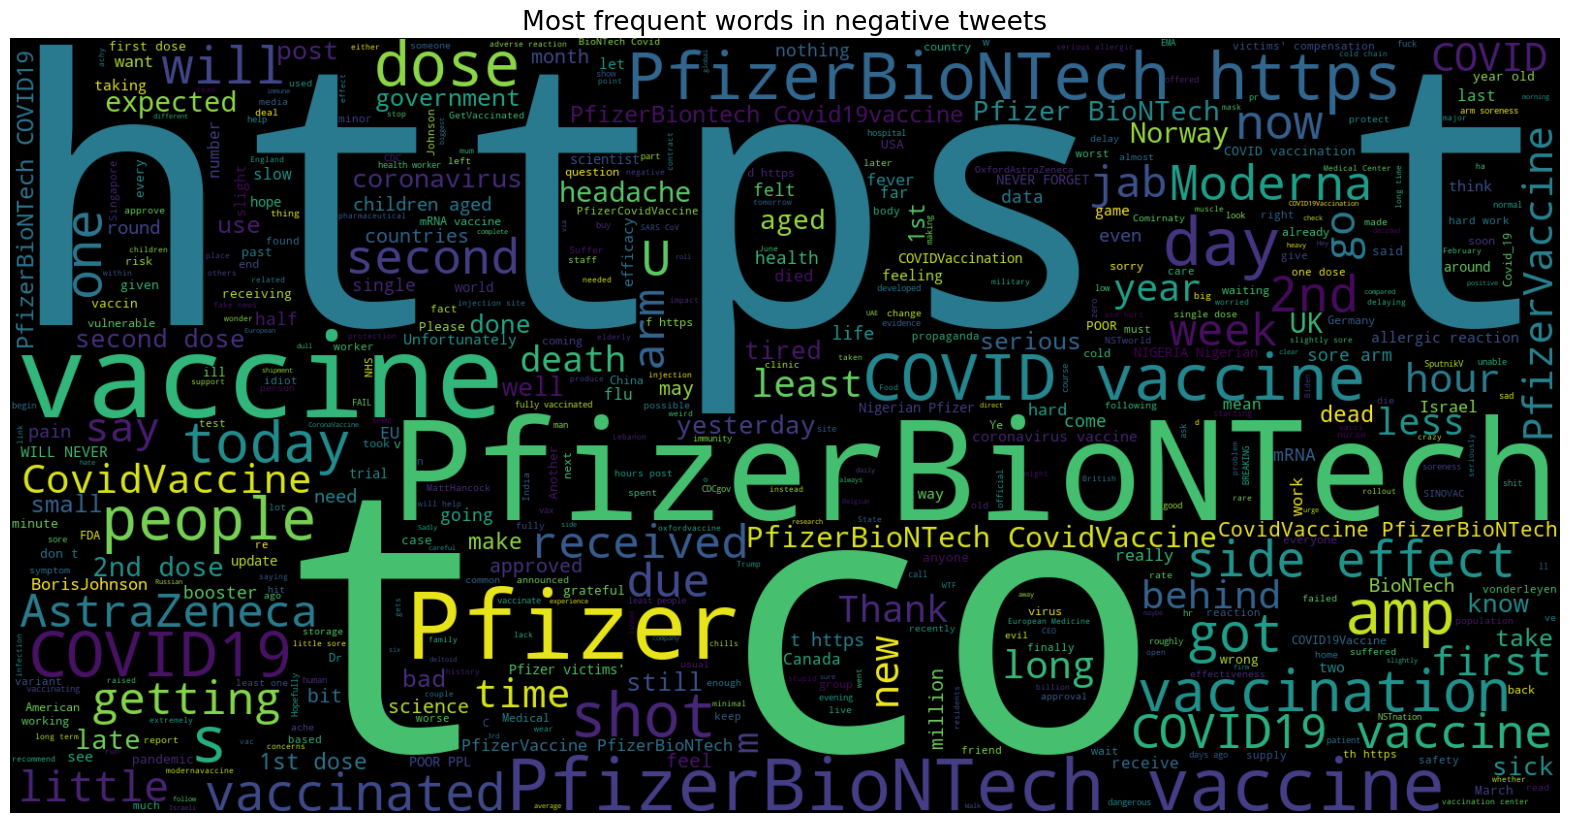

In [63]:

text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [65]:

neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.0,Neutral
7557,2nd dose #PfizerBiontech #COVID19Vaccination h...,0.0,Neutral
7599,Had my second #PfizerBiontech #CovidVaccine do...,0.0,Neutral
7596,"#NSTnation A total of 25,770 cases or 3.5 per ...",0.0,Neutral
7595,#PfizerProud 👇🏻 of our leadership - #PFECollea...,0.0,Neutral


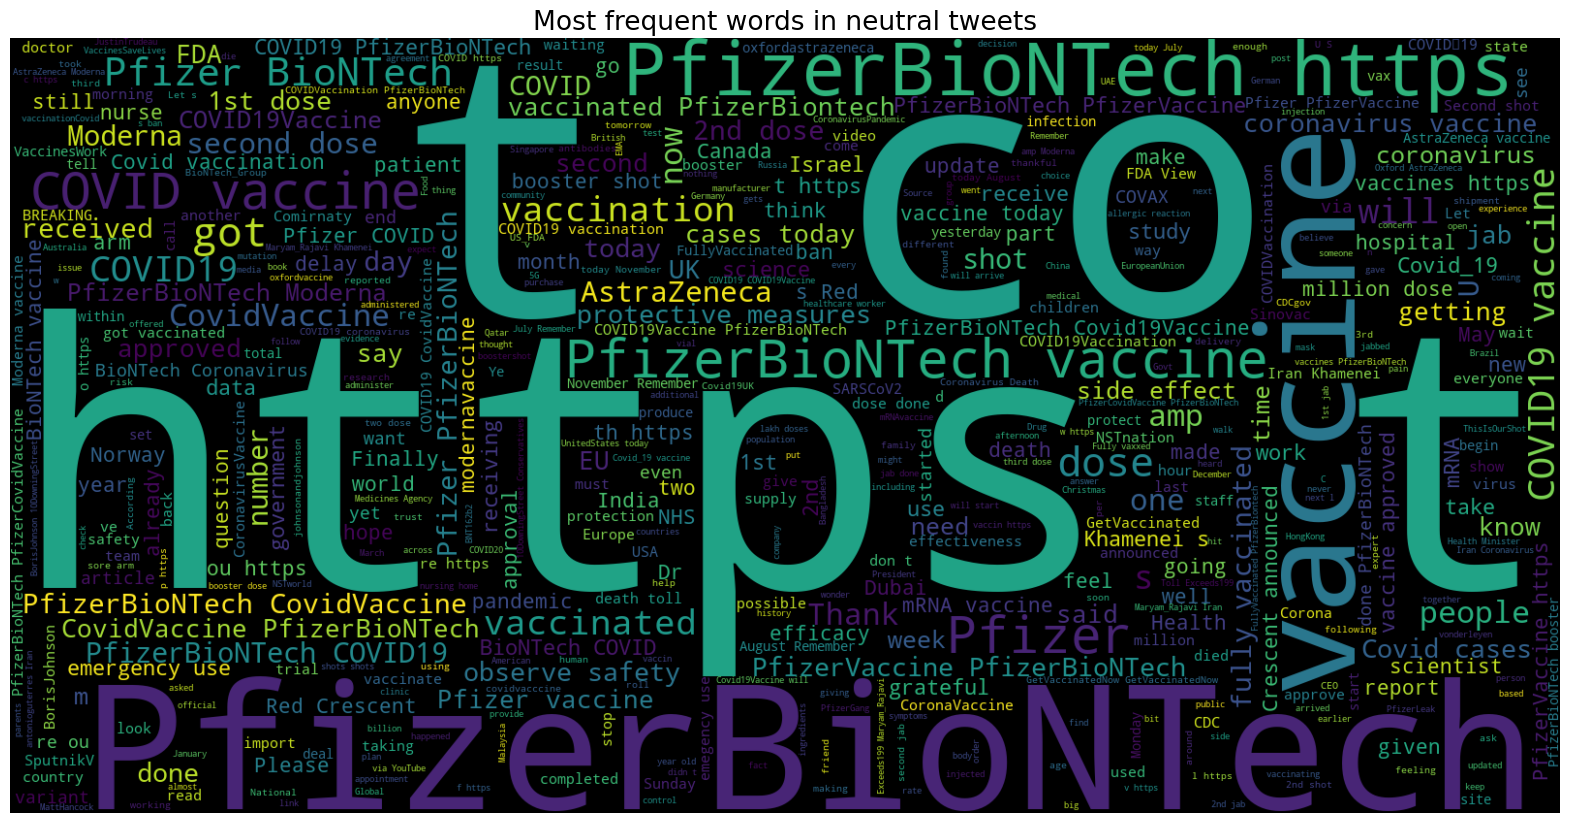

In [66]:

text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [69]:

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [70]:
feature_names = vect.get_feature_names_out()


In [72]:
print(type(vect))


<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X = vect.fit_transform(["This is a test", "Another test sentence"])  # this step is required

feature_names = vect.get_feature_names_out()
print(feature_names[:20])


['another' 'is' 'sentence' 'test' 'this']


In [74]:
try:
    feature_names = vect.get_feature_names_out()
except AttributeError:
    feature_names = vect.get_feature_names()

In [75]:

X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)


In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [77]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8810, 5)
Size of y_train: (8810,)
Size of x_test: (2203, 5)
Size of y_test: (2203,)


In [78]:
import warnings
warnings.filterwarnings('ignore')


In [79]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 50.30%


In [80]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[  0 194  52]
 [  1 890 155]
 [  0 693 218]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       246
     Neutral       0.50      0.85      0.63      1046
    Positive       0.51      0.24      0.33       911

    accuracy                           0.50      2203
   macro avg       0.34      0.36      0.32      2203
weighted avg       0.45      0.50      0.43      2203



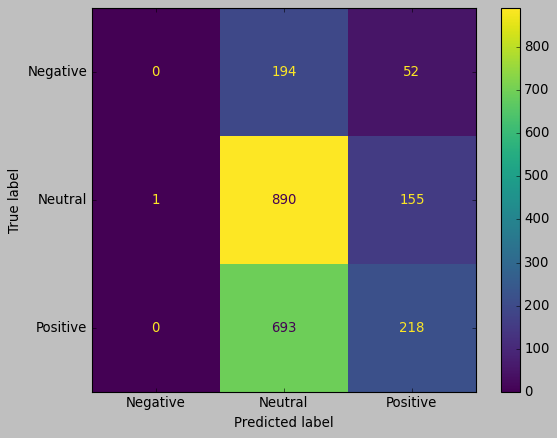

In [81]:

style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()


In [82]:

from sklearn.model_selection import GridSearchCV

In [83]:

param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [84]:

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [85]:

y_pred = grid.predict(x_test)


In [86]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.30%


In [87]:

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))


[[  0 194  52]
 [  1 890 155]
 [  0 693 218]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       246
     Neutral       0.50      0.85      0.63      1046
    Positive       0.51      0.24      0.33       911

    accuracy                           0.50      2203
   macro avg       0.34      0.36      0.32      2203
weighted avg       0.45      0.50      0.43      2203



In [88]:
from sklearn.svm import LinearSVC


In [89]:

SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [90]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 50.30%


In [91]:

print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))


[[  0 194  52]
 [  1 890 155]
 [  0 693 218]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       246
     Neutral       0.50      0.85      0.63      1046
    Positive       0.51      0.24      0.33       911

    accuracy                           0.50      2203
   macro avg       0.34      0.36      0.32      2203
weighted avg       0.45      0.50      0.43      2203



In [92]:

grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [93]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.01}


In [94]:

y_pred = grid.predict(x_test)

In [95]:
ogreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.30%


In [96]:

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  0 194  52]
 [  0 892 154]
 [  0 694 217]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       246
     Neutral       0.50      0.85      0.63      1046
    Positive       0.51      0.24      0.33       911

    accuracy                           0.50      2203
   macro avg       0.34      0.36      0.32      2203
weighted avg       0.45      0.50      0.43      2203

